<a href="https://colab.research.google.com/github/patriciamedyna/Classifier_page/blob/main/Fastai_with_tags_RVLCDIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ -e /content ] && pip install -Uqq fastai

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook

In [3]:
#hide
from fastbook import *
from IPython.display import display,HTML

In [4]:
from fastai.basics import *
from fastai.text.core import *
from fastai.text.data import *
from fastai.text.models.core import *
from fastai.text.models.awdlstm import *
from fastai.callback.rnn import *
from fastai.callback.progress import *

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = '/content/drive/MyDrive/Colab Notebooks/Datasets/RVL_CDIP/labels/'
df_train = pd.read_csv(path + 'train_tags.csv', delimiter=',', error_bad_lines=False)

In [7]:
df_train.head()

,path,label,texttags
0,imagese/e/w/c/ewc23d00/513280028.tif,1,"\nxxQ00_01 xxbob 7002 00 OF\nxxeob xxQ00_01\n\nxxQ00_00xxbob P (2 DOCUMENT CLEARANCE SHEET\nxxbcet (For Original Contracts Only) xxecet\n2004-00-00\nCONTRACT #\nCONTRACT SUBJECT: \TCHBL 1\nxxbcet COMPANY: |. BEI INS BRAND(s): _CAMEL xxecet\nTOTAL COST: _$528,000 CURRENT YEAR EFO: _($528,000:\nxxeob xxQ00_01\n\nxxQ00_00xxbob xxbcet BRIEF DESCRIPTION: _D. D. BEAN WILL PRODUCE AND DISTRIBUTE UP TO 264,000 CASES _ xxecet\nOF PRINTED CAMEL ADVERTISING ON MATCHBOOKS,\nPROGRAM]\nG/L CODE: 04-73-4600-8215-855 LINE ITEM: 200737-072402\n*IMPLEMENTOR: _S. B. DRISKE! **BRAND MANAGEMENT: __E. C. LEARY...."
1,imagesw/w/b/t/wbt26e00/2053453161.tif,7,"\nxxQ00_00 xxbob ‘CABARRUS COUNTY\nxxeob xxQ00_00\n\nxxQ00_01xxbob EFFECTIVE DATE: 03/08/93,\nxxeob xxQ00_01\n\nxxQ01_00xxbob \nxxeob xxQ01_01\n\nxxQ01_00xxbob \nxxeob xxQ02_00\n\nxxQ02_00xxbob \nxxeob xxQ02_00\n\nxxQ00_00xxbob MARLBORO 100 REGULAR SP RED STANOARO. PRODUCTION\nBRAND CODE-00540 (S10)\nCIoARETTE LENGTH =: 99.5, mM FTOTAR «16.0 Movolor 15.5 17.4\n=\nToBAcco TOBACCO ROD ROD ciRcUM, LENGTH —: reo 24.80 va vt\nTipp FicTER ine LeneTh LENGTH 311500 ans 14 vot\nTOTAL R.T.0, leo aM, W20\nDILUTION TARGET 14.0 +/- 5.0 %\nTIPPING PAPER /USE UP: 631M X 3000! coRK DGL Eo-T01 12-4l-B..."
2,imagesm/m/k/m/mkm05e00/2040792992_2040792994.tif,10,"\nxxQ00_00 xxbob 4 LEO BURNETT U.S.A.\nxxeob xxQ00_00\n\nxxQ00_00xxbob \nxxeob xxQ00_00\n\nxxQ00_00xxbob ADVERTISING NEWSPAPER\n:\n. ESTIMATE RECKP PNOt\n~\nPERIOD DATE 03/08/81\n01/01/80 70 12/31/80 PAGE 1\nCLIENT: P.M. INC. OFFICE: 10 DESC: 703A MARLBORO RED ROP\nxxeob xxQ00_01\n\nxxQ00_00xxbob EST NO: 0008 REVISES EST DTD 02/08/91\nxxeob xxQ00_00\n\nxxQ00_00xxbob PRopucT PeRTOD cross. AMOUNT CHANGE Ross. Gross\nLESS C/D\ntO-MARLBORO Fee YAN 1990 8,624.00 8,624.00\nmar 68,982.00 25,872.00 28,872.00\n8,992.00 .00\nQUARTER + 103,488.00 103488\nmay AeR 98,403.06 88,403.06\n71,868.00 71,868..."
3,imageso/o/e/x/oex80d00/522787731+-7732.tif,3,\nxxQ00_01 xxbob 1\n2\nOFF\nApc aia\no\nxxbcet BMS xxecet\nreli cermowe eee\nery\n78H\n.\nxxeob xxQ02_01\n\nxxQ00_00xxbob \nxxeob xxQ02_00\n
4,imagesq/q/v/t/qvt06d00/50525666-5667.tif,14,"\nxxQ00_00 xxbob CURRICULUM VITAE:\nxxeob xxQ00_00\n\nxxQ00_01xxbob \nxxeob xxQ00_01\n\nxxQ00_01xxbob \nxxeob xxQ00_01\n\nxxQ00_00xxbob Name: tzhack Polacheck, Ph.D. Position Title: Assoc. Prof,\nEDUCATION:\nInstitution and Location Degree Year Field of Study\nHebrew University Jerusalem, Israel BSe 1969 Bichemisiry & Microbiology\nHebrew University Jerusalem, Israel MSc. 1971 Microbiology\nHebrew University Jerusalem, Israel PhD. 1977 Microbiology\nNIAMD, NIH, MD, USA. Post. Doc. 1978 Microbivlony\nNIAID, NIH, MD, USA Post Dec. 1981 Medical Mycology\nProfessional Experience: Jerusalem, ..."


In [8]:
path = '/content/drive/MyDrive/Colab Notebooks/Datasets/RVL_CDIP/labels/'
df_test = pd.read_csv(path + 'test_tags.csv', delimiter=',', error_bad_lines=False)

In [11]:
df_test

,path,label,texttags
0,imagesc/c/e/j/cej80d00/517306722+-6724.tif,3,"\nxxQ00_00 xxbob \nxxeob xxQ00_00\n\nxxQ01_01xxbob ""$1730\n6722\nxxeob xxQ01_01\n\nxxQ01_01xxbob he\n(qey\nxxeob xxQ01_01\n\nxxQ00_00xxbob GP\n~\nod “SOL\ndiz = .\nPAOLO sr\nSL py\nene T xf 1°H Mem\n~\nSy Aya\nOL uw Spree won 266)\nvor Faunp\noi yr, “A\nxxbcet yee NALD conn xxecet\nxxeob xxQ01_01\n"
1,imagesm/m/r/r/mrr36d00/50603620-3621.tif,14,"\nxxQ00_00 xxbob xxbcet CO-INVESTIGATOR xxecet\nxxeob xxQ00_01\n\nxxQ00_00xxbob \nxxeob xxQ00_01\n\nxxQ00_00xxbob NAME POSITION/TITLE BIRTHDATE\nRobert H. McCusker, Jr. Res. Assistant Professor 11-12-54\nxxbcet EDUCATION xxecet\nxxbcet Institution/ Year ‘Field of xxecet\nxxbcet Location Degree Conferred Study xxecet\nxxeob xxQ00_01\n\nxxQ00_00xxbob \n \nxxeob xxQ00_01\n\nxxQ00_00xxbob \nxxeob xxQ00_01\n\nxxQ00_00xxbob The Pennsylvania State Univ. M.S. B.S.\nThe Pennsylvania State Univ. 1980 Physiology\nThe University of Georgia Ph.D. 1985 Foods & Nutr.\nxxbcet RESEARCH AND PROFESSIO..."
2,imagesg/g/t/u/gtu29c00/2084573574a.tif,2,"\nxxQ00_00 xxbob Original Message\nFrom Wile, Vivian\nMonday, Api 03,2000 1:44 PM\n‘nse, Robin\nRE: Nivesamine Review\nxxeob xxQ00_00\n\nxxQ00_00xxbob xxbcet xxecet\nxxeob xxQ00_00\n\nxxQ00_00xxbob \nxxeob xxQ00_00\n\nxxQ00_00xxbob Totally possible. Thanks for responding.\nxxeob xxQ00_00\n\nxxQ00_00xxbob Please let of me know if you would like to give an update of your activities and the approximate\namount time you will need.\nxxeob xxQ00_01\n\nxxQ00_00xxbob If there are others from your area that should be included please let me know.\nxxeob xxQ00_01\n\nxxQ00_00xxbob 1! be out of the ..."
3,imagesh/h/o/f/hof08d00/2071783492.tif,9,\nxxQ00_00 xxbob 04/18/98 09:37 G1 7+338-8886 MCKAY FRIED Boooz/0002\nxxeob xxQ00_01\n\nxxQ01_00xxbob \nxxeob xxQ01_01\n\nxxQ01_01xxbob 2eveez1z0z\nxxeob xxQ02_01\n
4,imagesx/x/a/b/xab71f00/1002977593_1002977622.tif,6,\nxxQ00_00 xxbob \nxxeob xxQ00_00\n\nxxQ01_00xxbob \nxxeob xxQ01_00\n\nxxQ01_00xxbob \nxxeob xxQ01_01\n\nxxQ01_01xxbob xxbcet eo xxecet\nfeoP\nxxeob xxQ02_01\n\nxxQ01_01xxbob 1002977593\nxxeob xxQ02_01\n\nxxQ01_01xxbob eg ssa\nsp Seeds\node\nxxeob xxQ02_01\n\nxxQ01_01xxbob eeeestyd\nother\na)\nxxeob xxQ01_01\n\nxxQ01_01xxbob cerry\n9 More\n070\nxxeob xxQ02_01\n\nxxQ00_00xxbob \nxxeob xxQ00_00\n
...,...,...,...
39994,imagesx/x/a/t/xat14f00/0000371340.tif,15,\nxxQ00_01 xxbob n.R sentT\nOFC + & nee\nxxeob xxQ00_01\n\nxxQ02_00xxbob eee)\nxxeob xxQ02_00\n
39995,imagesk/k/v/w/kvw25f00/0060211544.tif,12,"\nxxQ00_01 xxbob 23.581,3600, Greenwich, 40\nCT Pemberwick larketing\nFAX: 05831\nRoad and\n203.532.0116 Communications\nxxeob xxQ01_01\n\nxxQ00_01xxbob Clarion\nxxeob xxQ00_01\n\nxxQ00_00xxbob \nxxeob xxQ01_00\n\nxxQ01_00xxbob Recommendation Carlton\n4th\nQuarter\nDirect\nMail\nxxeob xxQ02_00\n\nxxQ01_00xxbob May\n27,\n1994\nxxeob xxQ01_00\n\nxxQ01_00xxbob emelnunz204.pt\nxxeob xxQ01_00\n"
39996,imagesq/q/e/q/qeq21a00/0071019136.tif,8,\nxxQ01_01 xxbob fl\nxxeob xxQ01_01\n\nxxQ01_00xxbob \nxxeob xxQ01_00\n\nxxQ01_00xxbob \nxxeob xxQ02_00\n\nxxQ01_00xxbob a\nxxeob xxQ01_00\n\nxxQ00_00xxbob xxbcet Lady xxecet\nxxbcet WoT xxecet\nxxbcet TASK) xxecet\nxxbcet DIO] xxecet\nxxbcet SPR xxecet\nxxeob xxQ01_00\n
39997,imagesw/w/b/v/wbv80e00/88131792.tif,11,\nxxQ00_01 xxbob <Saomrwamens\nINNOOSIG\nxxbcet HSVO| xxecet\nxxeob xxQ01_01\n\nxxQ00_01xxbob \nxxeob xxQ00_01\n\nxxQ00_01xxbob \nxxeob xxQ01_01\n\nxxQ01_01xxbob 88131792\nxxeob xxQ01_01\n\nxxQ01_00xxbob \nxxeob xxQ01_00\n\nxxQ00_01xxbob \nxxeob xxQ01_01\n\nxxQ01_01xxbob xxbcet xxecet\nxxeob xxQ01_01\n\nxxQ00_00xxbob \n \nxxeob xxQ01_00\n\nxxQ00_01xxbob \nxxeob xxQ01_01\n\nxxQ01_01xxbob i>\n=\nxxbcet |aere xxecet\narr]\nxxeob xxQ01_01\n\nxxQ00_00xxbob (abe\nAEE\nan\nxxeob xxQ00_01\n\nxxQ00_01xxbob xxbcet xxecet\nxxeob xxQ00_01\n\nxxQ00_01xxbob \nxxeob xxQ01_01\n\nxxQ01_01xxbob ...


In [9]:
df_test.shape

(39999, 3)

In [10]:
df_train.shape

(319999, 3)

In [12]:
df_val = pd.read_csv(path + 'val_tags.csv', delimiter=',', error_bad_lines=False)

In [13]:
df_val

,path,label,texttags
0,imagesi/i/y/k/iyk38c00/512015827+-5827.tif,0,"\nxxQ00_01 xxbob Fi J Reynolds Tobacee Cory\nxxeob xxQ00_01\n\nxxQ00_01xxbob \nxxeob xxQ00_01\n\nxxQ00_00xxbob January 22, 1990\nDear Fellow Employee:\nxxeob xxQ00_00\n\nxxQ00_00xxbob You no doubt heard over the weekend thal we have deckied to cancel our Philadelphia test market of Uptown\nCigarettes, {regret not informing you about this decision before we told the news media, but the decision was\nmade late Friday evening. and because of the enormous media attention focused on the product. was\nimportant that we immediately made our decision public.\nxxeob xxQ01_01\n\nxxQ01_00xxbob ur in..."
1,imagesr/r/r/e/rre21e00/87103403.tif,0,"\nxxQ00_00 xxbob MICROBIOLOGICAL\nxxeob xxQ00_00\n\nxxQ00_00xxbob ASSOCIATES INC\nxxeob xxQ00_00\n\nxxQ00_01xxbob ‘CORPORATE OFFICES © Maryland 20816-1493\n15221 River Road » Bethesda\n(801) 654.3400 Telex 90-8793\nxxeob xxQ00_01\n\nxxQ00_00xxbob March 25, 1987\nxxeob xxQ00_00\n\nxxQ00_00xxbob Dr. Thomas A. Vollmuth\nLorillard Research Center\n420 English Street\nP.O, Box 21688\nGreensboro, North Carolina 27420\nxxeob xxQ01_00\n\nxxQ01_00xxbob Dear Tom,\nxxeob xxQ01_00\n\nxxQ01_00xxbob \nxxeob xxQ01_00\n\nxxQ01_00xxbob I forgot to discuss the prices for the SCE studies in the\nxxbcet lett..."
2,imagesk/k/s/u/ksu44c00/03636607.tif,4,"\nxxQ00_00 xxbob xxbcet xxecet\nxxeob xxQ00_00\n\nxxQ00_00xxbob (Chawwet Jo)\novacco roan\nxxeob xxQ00_01\n\nxxQ00_00xxbob Broadcast April 17, 1979\nEditorial Director Bernadette Phillips\nNorman Davis, Area Vice President\nPresented by:\nxxeob xxQ00_01\n\nxxQ00_00xxbob robacco smoke is more than just very irritating to some\nsmoking hazardous to your health and\n=~\npeople -- is\nhealth of non-smokers caught downwind from\nthe many\nxxbcet inconsiderate smoker. But we think the anti-smoking xxecet\nan\nsmoldering in Dade County is even more\nordinance now\ndangerous to the healthy funct..."
3,imagesr/r/a/i/rai09d00/50437856-7857.tif,14,"\nxxQ00_00 xxbob Una S. Ryan Professor of Medicine December 18, 1941.\nxxeob xxQ00_01\n\nxxQ00_00xxbob Bristol University, Bristol, England B.Sc 1963 Zoology, Chemistry\nand Microbiology\nCambridge University, Cambridge, England Ph.D. 1968 Gell Biology\nxxeob xxQ00_01\n\nxxQ00_00xxbob 1967 ~ 1971 Director, Laboratory for Ultrastructure studies,\nHoward Hughes Medical Institute, Miami, Florida\n1972 1977 Assistant Professor of Medicine, University of Miami\n-\nSchool of Medicine, Miami, Florida\n1977 - 1980 Associate Professor of Medicine, University of Miami\nSchool of Medicine, Miami, Flo..."
4,imagesd/d/q/j/dqj13f00/0000457436.tif,12,\nxxQ00_00 xxbob \nxxeob xxQ00_00\n\nxxQ00_00xxbob \nxxeob xxQ00_00\n\nxxQ00_00xxbob xxbcet -DRAPT- xxecet\nxxbcet MANUFACTURING QUALITY PRODUCTS xxecet\nxxeob xxQ00_01\n\nxxQ01_00xxbob xxbcet Prepared by xxecet\nxxeob xxQ01_01\n\nxxQ01_00xxbob xxbcet Marcel A. Hamann xxecet\nxxbcet Quality Assurance Department xxecet\nBrown & Williamson Tobacco Corporation\nxxbcet Wovember 1989 xxecet\nxxeob xxQ02_01\n\nxxQ02_01xxbob 681001023\nxxeob xxQ02_01\n
...,...,...,...
39994,imageso/o/u/k/ouk93f00/0013006838.tif,10,"\nxxQ00_00 xxbob The Tobacco Institute\nIndustry Support of Biomedical Research\nxxeob xxQ00_01\n\nxxQ01_01xxbob \nxxeob xxQ01_01\n\nxxQ00_00xxbob 1981\nINSTITUTION\nTOTAL\nALABAMA\nUniversity of Southern Alabama $46,619\nARIZONA\nArizona Health Sciences Center\n5,500\nSALIORNIA\nCalifornia Biomedical\nResearch Foundation\n75,000\nHuntington Memorial Institute 97,955\nSan Diego State University\n76,175\nScripps Clinic &\nResearch Foundation 84,132\nStanford University\n59,570\nUniversity of California Berkeley 76,934\nUniversity of California Davis 87,400\nUniversity of California Irvine ..."
39995,imagesf/f/f/b/ffb52c00/2074103881.tif,11,\nxxQ00_00 xxbob ‘a.coweames\nxxeob xxQ00_00\n\nxxQ00_00xxbob \nxxeob xxQ00_00\n\nxxQ00_00xxbob \nxxeob xxQ00_00\n\nxxQ00_01xxbob \nxxeob xxQ00_01\n\nxxQ00_00xxbob \nxxeob xxQ00_01\n\nxxQ00_00xxbob 

## Create DataLoader

In [14]:
def get_features(r):

  return r['text']

def get_labels(r):

  return r['label']

In [15]:
df_train.keys()

Index(['path', 'label', 'texttags'], dtype='object')

In [ ]:
#df_train = df_train[100000:200000]

In [16]:
dblock_train = DataBlock(
    blocks=(TextBlock.from_df(text_cols=['texttags', 'label'], seq_len=72), CategoryBlock),
            get_x=get_features, 
            get_y=get_labels)

dls = dblock_train.dataloaders(df_train, bs=64)
#dls.show_batch(max_n=2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,category
0,xxbos xxfld 1 \n xxq01_01 xxbob \n xxeob xxq02_01 \n\n xxq00_01xxbob \n xxeob xxq00_01 \n\n xxq01_01xxbob \n xxeob xxq02_01 \n\n xxq02_01xxbob \n xxeob xxq02_01 \n\n xxq01_01xxbob \n xxeob xxq02_01 \n\n xxq00_01xxbob \n xxeob xxq00_01 \n\n xxq00_01xxbob \n xxeob xxq00_01 \n\n xxq00_01xxbob \n xxeob xxq00_01 \n\n xxq01_01xxbob \n xxeob xxq02_01 \n\n xxq00_01xxbob \n xxeob xxq00_01 \n\n xxq02_01xxbob \n xxeob xxq02_01 \n\n xxq00_01xxbob \n xxeob xxq02_01 \n\n xxq02_01xxbob xxbcet xxecet \n xxeob xxq02_01 \n\n xxq01_01xxbob \n xxeob xxq02_01 \n\n xxq00_01xxbob \n xxeob xxq00_01 \n\n xxq01_01xxbob \n xxeob xxq02_01 \n\n xxq00_01xxbob \n xxeob xxq00_01 \n\n xxq02_01xxbob \n xxeob xxq02_01 \n\n xxq01_01xxbob \n xxeob xxq01_01 \n\n xxq00_01xxbob \n xxeob xxq00_01 \n\n xxq02_00xxbob \n xxeob xxq02_01 \n\n xxq02_00xxbob \n xxeob xxq02_01 \n\n xxq02_00xxbob \n xxeob xxq02_01 \n\n xxq01_00xxbob \n xxeob xxq02_00 \n\n xxq02_00xxbob \n xxeob xxq02_01 \n\n xxq02_00xxbob xxbcet xxecet \n xxeob xxq02_00 \n\n xxq02_00xxbob \n xxeob xxq02_01 \n\n xxq02_00xxbob \n xxeob xxq02_01 \n\n xxq02_00xxbob,5
1,"xxbos xxfld 1 \n xxq00_00 xxbob \n xxeob xxq00_00 \n\n xxq00_00xxbob xxup wall xxup street xxup jou : \n xxmaj july 14 , 1967 \n xxeob xxq00_00 \n\n xxq00_00xxbob \n xxeob xxq00_00 \n\n xxq00_00xxbob xxbcet xxecet \n xxeob xxq00_00 \n\n xxq00_00xxbob oe \n xxmaj ne \n xe \n xxeob xxq00_00 \n\n xxq00_00xxbob \n xxeob xxq00_00 \n\n xxq00_00xxbob tn \n xxeob xxq00_00 \n\n xxq00_00xxbob xxbcet ‘ columbia xxmaj univerity xxunk reports xxecet \n ear \n ew ler type this week of xxunk fat xxmaj it xxunk hag that xxunk xxunk rights woud t & \n xxunk tar content of cigaret xxmaj xxunk xxmaj by ” two \n [ tras mors than existing commercial filers , \n 2 \n me university sald xxmaj if wit xxmaj xxunk and \n any \n ait xxunk companies to use the xxunk , xxmaj the \n xxmaj joly xxunk i that the xxmaj hite be used",9


## Classification Model

In [17]:
from fastai.text.all import *

In [18]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5,metrics=[error_rate, accuracy]).to_fp16()

In [19]:
learn.fine_tune(1, 2e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.340962,0.654210,0.183925,0.816075,17:23


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.025257,0.000155,0.000031,0.999969,44:19


In [20]:
learn.show_results()

,text,category,category_
0,"xxbos xxfld 1 \n xxq00_00 xxbob \n xxeob xxq02_00 \n\n xxq00_00xxbob \n xxeob xxq00_00 \n\n xxq00_00xxbob xxmaj general xxmaj xxunk \n xxbcet ng eu wit former i | xxecet \n ied ute xxmaj justice xxmaj his departure xxmaj department leaves xxunk the \n xxbcet second xxmaj while xxunk xxmaj xxunk resignation decision fo xxmaj ia | xxecet \n med fromthe xxunk , dispute \n xxmaj law xxmaj firm , his announcement \n jor the xxmaj xxunk conto : \n fic xxmaj page az ) \n ‘ it has come under fe for his \n tation ofthe xxup reg oer xxmaj ut took \n { son i m xxmaj xxunk represented xxunk the xxup atc and in he \n st xxmaj madison 's altar \n @ vas xxunk transferred xxmaj kore , xxmaj xxunk xxunk xxunk xxup ds \n reports , posing another stun \n & lor renewal of xxmaj chin",9,9
1,"xxbos xxfld 1 \n xxq00_00 xxbob ° xxup the xxup new xxup york xxup times \n xxmaj new xxmaj york , xxmaj new xxmaj york \n xxup s. \n “ april 15 , 1966 \n xxeob xxq00_00 \n\n xxq00_00xxbob 2 xxup xxunk \n xxunk \n © xxup by xxup tax xxup officials \n xxeob xxq00_00 \n\n xxq00_00xxbob xxunk xxunk \n xxmaj smuggling xxmaj from xxmaj south \n to xxmaj evade xxmaj local xxmaj xxunk \n xxeob xxq00_00 \n\n xxq00_00xxbob \n▁\n xxeob xxq00_00 \n\n xxq00_00xxbob 82 ° "" \n xxmaj by xxup martin xxup arnold \n xxup baltimore , xxmaj april 4 — xxmaj or- \n | \n xxunk crime ‘ xxunk . are \n ‘ apparently taking over the \n xxunk cigarette business , tax \n sy \n xxunk sald here today . \n ss \n xxmaj indications of the organized \n xxunk of the smuggling , mostly \n ‘",9,9
2,"xxbos xxfld 1 \n xxq02_00 xxbob xxmaj ns \n xxeob xxq02_00 \n\n xxq00_00xxbob xxmaj classified \n xxeob xxq00_00 \n\n xxq00_00xxbob xxunk xxrep 4 e ae oe \n xxmaj xxunk xxup xxunk the xxunk year , xxup advertisements per of tha word xxunk . xxmaj rate : times ww 1 fa xxunk xxmaj size cone \n xxmaj gea yet , per word 448 % $ 0 . 15 times 6 in contact \n xxup bot xxmaj xxunk xxup sbs ora xxmaj pb xxmaj pose $ 4 . xxunk xxmaj fe , or xxunk and 20 . tee mumber for i words . couse xxunk xxunk for yen , a \n 2 \n xxunk , xxmaj full xxunk must accompany , your \n xxmaj xxunk xxmaj adder : xxmaj xxunk ” xxmaj department , xxmaj wea \n xxbcet xxmaj xxunk 488 xxmaj xxunk xxmaj ave , xxmaj net , xxmaj nat .",4,4
3,"xxbos xxfld 1 \n xxq00_00 xxbob xxmaj diversification in the tobacco industry \n xxeob xxq00_01 \n\n xxq00_00xxbob xxmaj the following able representa xxunk tothe xxunk \n xxbcet profiles of the six xxmaj american cigarette manufacturers published xxecet \n xxbcet xxmaj medicine xxmaj inthe xxmaj december ( 63 : 1328 - 1332 ) 1983 xxrep 3 s ue and of xxunk the xxmaj new xxmaj york xxmaj the xxmaj state xxmaj cigarete xxmaj journal xxmaj under . of xxecet \n xxbcet world the subsidiaries , xxmaj secaucus , xxmaj ni , xxup us xxmaj lyle xxunk xxmaj stuart , brands , 1985 ) , xxunk xxmaj the caries themes . tables at . ad xxecet \n xxbcet ‘ xxunk agencies , and sponsorships and promotions . xxmaj als noted xxecet \n vere figures on overall advertising expenditures , \n ‘ cigaretes ate by far the mos advertised prot \n in soir",9,9
4,"xxbos xxfld 1 \n xxq00_00 xxbob \n xxeob xxq00_01 \n\n xxq00_00xxbob vat \n xxeob xxq00_00 \n\n xxq00_00xxbob xxmaj simian xxmaj sarcoma xxmaj virus onc xxmaj gene , v - sis , xxmaj is xxmaj derived from the \n xxeob xxq00_01 \n\n xxq00_00xxbob xxmaj gene ( or xxmaj genes ) xxmaj encoding a platelet - derived xxmaj growth xxmaj factor \n xxeob xxq00_01 \n\n xxq00_00xxbob xxup ry \n xxeob xxq00_00 \n\n xxq00_00xxbob i "" xxmaj abstract . xxmaj the transforming protein of a primate sarcoma virus and a platelet- \n xxeob xxq00_01 \n\n xxq00_00xxbob \n xxeob xxq00_00 \n\n xxq00_00xxbob derived grow \n ‘ 0 xxmaj this xxunk \n xxeob xxq00_00 \n\n xxq00_00xxbob \n▁\n xxeob xxq00_00 \n\n xxq00_00xxbob sis , and @ human platelet - derived grow ? \n xxeob xxq00_00 \n\n xxq00_00xxbob transforms cells could involve the constitutive expression of a protein with

In [21]:
learn.save('text_classification_ctags')

Path('models/text_classification_ctags.pth')

In [22]:
# load model
learn = learn.load('text_classification_ctags')

In [23]:
learn.unfreeze()
learn.fit_one_cycle(2, 2e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.037646,0.000424,0.000172,0.999828,44:27
1,0.028535,0.000059,0.000000,1.000000,44:21


SuggestedLRs(valley=6.309573450380412e-07)

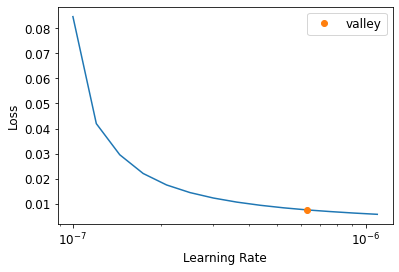

In [24]:
learn.unfreeze()
learn.lr_find()

In [25]:
learn_lm = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5,metrics=[error_rate, accuracy]).to_fp16()

In [26]:
learn_lm.fine_tune(2, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.265077,0.677272,0.185081,0.814919,17:24


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.034830,0.000053,0.000000,1.000000,44:26
1,0.026529,0.000030,0.000000,1.000000,44:20


##Validation

In [ ]:
#df_test = df_test[0:3000]

In [27]:
# create dataloader of test
dblock_test = DataBlock(
    blocks=(TextBlock.from_df(text_cols=['texttags', 'label'], seq_len=72), CategoryBlock),
            get_x=get_features, 
            get_y=get_labels)

dloader_test = dblock_test.dataloaders(df_test, bs=64)
#dloader_test.show_batch(max_n=2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [28]:
test_dl = dloader_test.test_dl(df_test['texttags'])
preds = learn_lm.get_preds(dl=test_dl, with_decoded=True)

In [29]:
len(preds)

3

In [30]:
learn_lm.validate()

(#3) [3.0285740649560466e-05,0.0,1.0]

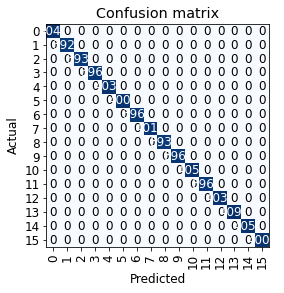

In [31]:
interp = ClassificationInterpretation.from_learner(learn_lm)
interp.plot_confusion_matrix()